# Part 3. Exploratory Data Analysis of the new dataset

Once we have obtained a clean dataset with the features that seem to be important for our analysis, we need to perform an Exploratory Data Analysis in order to understand how our data is organized.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [35]:
df = pd.read_csv('df_all_CLIM.csv')

In [4]:
df.sample(10)

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,TR18,TR17,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,TR07,TR06,TR05,TR04,TR03,TR02,TR01,TR00,DETERIORATION_RATE
2466,19,230980,2,0,steel,3,13.1,39.3,7.9,concrete,1956.0,0.0,63.0,light,0.00,countyHA,rural,high,0,-96.057667,43.272833,3.0,4.0,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,5.5,5.5,5.5,5.5,6.2,6.2,6.5,6.5,6.5,6.5,0.194444
216,19,000000000014250,2,30,steel,3,25.0,65.2,10.4,concrete,1950.0,0.0,69.0,light,1280.00,stateHA,rural,high,0,-92.089669,41.578169,5.2,5.2,5.200000,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.7,5.7,6.5,6.5,6.5,7.0,7.0,7.0,7.0,0.100000
9818,36,000000001010950,2,0,steel,3,61.8,167.6,12.8,concrete,1982.0,0.0,37.0,heavy,734.92,stateHA,rural,high,0,-76.576667,42.407667,6.5,7.0,7.000000,7.0,7.0,7.0,7.0,7.0,7.0,7.2,7.2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,0.055556
17718,39,2741938,2,0,steel,1,13.1,13.4,5.5,bituminous,1985.0,0.0,34.0,light,14.63,countyHA,rural,high,0,-82.223168,38.482333,5.5,5.5,5.500000,5.5,5.5,5.5,5.5,6.0,6.0,6.0,6.0,6.0,6.2,6.2,6.2,6.2,6.2,5.7,5.7,0.041176
2323,19,215760,2,0,steel,2,13.1,26.5,9.1,concrete,1965.0,0.0,54.0,light,25.60,countyHA,rural,high,0,-94.065168,43.144169,4.0,5.7,5.700000,5.7,5.7,6.2,6.2,6.2,6.2,6.2,6.2,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,0.138889
9856,36,000000001012772,2,40,steel,1,14.3,15.8,12.8,concrete,1956.0,1994.0,63.0,heavy,2704.80,stateHA,urban,high,1,-76.554334,42.087502,5.5,6.5,6.500000,6.5,6.5,6.5,6.5,6.7,6.7,6.7,6.7,6.7,6.7,7.2,7.2,7.2,7.2,7.2,7.2,0.094444
16933,39,1811118,1,99,steel,6,33.5,186.8,10.2,concrete,1974.0,1995.0,45.0,other,241.14,stateHA,urban,none,1,-81.301834,41.259835,8.0,8.0,8.666667,9.0,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.2,7.2,7.5,7.2,7.2,7.5,8.0,0.140000
16152,36,000000005513220,2,13,steel,4,20.4,71.0,13.1,concrete,1952.0,0.0,67.0,heavy,0.00,tollA,urban,none,0,-73.532335,42.148667,6.2,6.2,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,4.0,0.125000
4905,31,C001321860,2,0,steel,1,11.9,12.2,8.0,concrete,1985.0,0.0,34.0,light,0.00,countyHA,rural,high,0,-96.007000,40.566000,6.7,6.7,6.700000,6.7,7.2,7.2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,8.0,8.0,8.0,8.0,8.0,0.076471
9083,33,016101270012200,3,11,steel,8,23.5,191.7,19.1,bituminous,1976.0,0.0,43.0,heavy,2250.00,stateHA,urban,low,0,-71.251501,42.597002,5.7,5.7,5.700000,5.7,6.2,6.2,6.5,7.0,7.0,7.0,7.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,6.0,0.143750


In [4]:
print('The number of bridges in the dataset is', df.shape[0])
print('The number of features in the dataset is', df.shape[1])

The number of bridges in the dataset is 22518
The number of features in the dataset is 41


In [5]:
print('Our dataset includes %d states from the USA' %len(df['STATE_CODE_001'].unique()))

Our dataset includes 7 states from the USA


Let's plot how's the deterioration rate distribution among those states.

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


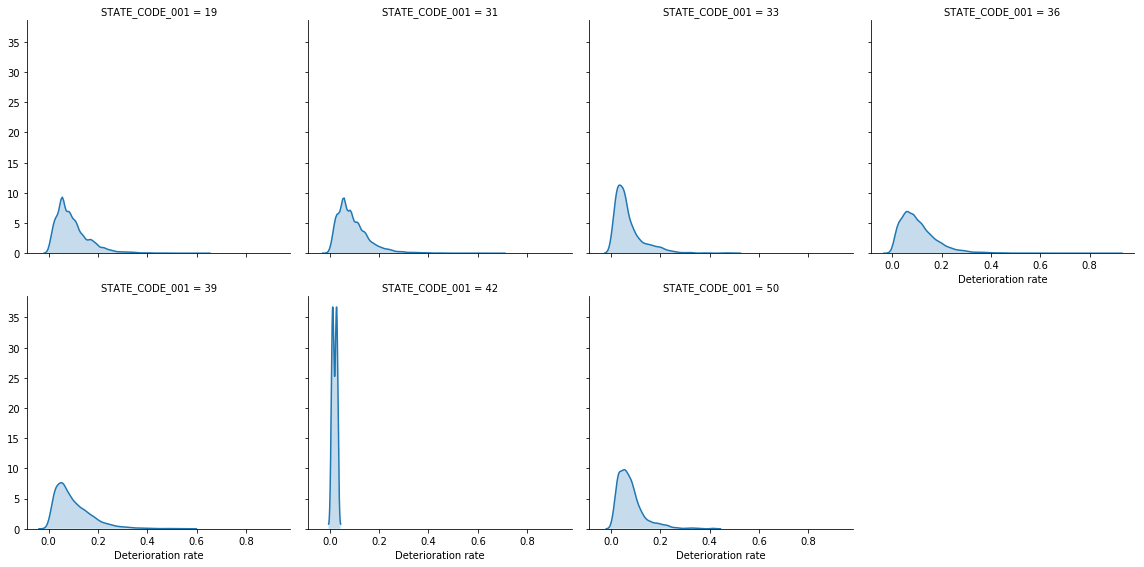

In [47]:
h = sns.FacetGrid(df, col = 'STATE_CODE_001', col_wrap=4, height = 4)
h.map(sns.distplot, 'DETERIORATION_RATE', hist = False, kde_kws = {'shade':True}).set_xlabels('Deterioration rate')


It seems that 6 of them have similar distribution of the deterioration rates. However, state 42 (Pennsylvania) presents some unusual data.

Let's check what could be the reason.

The state of Pennsylvania (42) does not follow the same distribution as the other states. We will take a look at those values to avoid getting disturbing data in our dataset.

In [8]:
# Let's check first for Pennsylvania

df[df['STATE_CODE_001']==42].shape

(2, 41)

After all the data cleaning we have performed on our dataset only 2 bridges from Pennsylvania are left. Such a small quantity of data for this feature will affect the trends we are looking at in our dataset.

In [36]:
df = df[df['STATE_CODE_001']!=42]

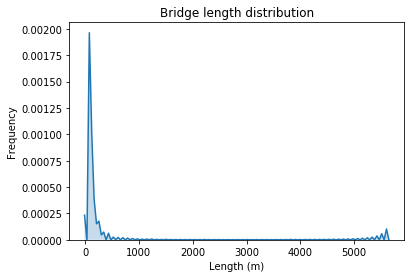

In [10]:
# Distribution of bridge length
ldist = sns.distplot(df['STRUCTURE_LEN_MT_049'], hist = False, kde_kws = {'shade':True})
ldist.set(title = 'Bridge length distribution', xlabel = 'Length (m)', ylabel = 'Frequency')
plt.show()

In [11]:
df['STRUCTURE_LEN_MT_049'].describe()

count    22516.000000
mean        52.406777
std         86.785046
min          6.100000
25%         15.200000
50%         36.600000
75%         64.600000
max       5630.300000
Name: STRUCTURE_LEN_MT_049, dtype: float64

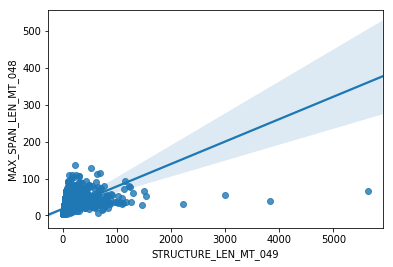

In [12]:
# Structure length and maximum span length relationship

sns.regplot(x='STRUCTURE_LEN_MT_049', y='MAX_SPAN_LEN_MT_048', data=df)

There are several bridges with lengths greater than 5000 m. However, keep in mind that we have filtered our data to have multi-girder decks made of steel and/or concrete. The bridges we are trying to analyse are for example the overpasses you see when driving on a highway. 

If we refer to bridge recommendations made by the Spanish transportation ministry 'Obras de paso de nueva construcción - Conceptos generales' (http://www.carreteros.org/normativa/estructuras/otras/pdfs/obrasdepaso.pdf) 

<img src = './luces-tipologias.PNG'>

Typical girder/beam bridges have between 15 and 40 m of span length. They usually have 3 or 4 spans, which means 4*40 = 160 m.

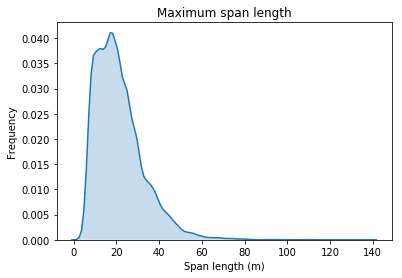

In [13]:
# Distribution of maximum span length

spanl = sns.distplot(df['MAX_SPAN_LEN_MT_048'], hist = False, kde_kws = {'shade':True})
spanl.set(title = 'Maximum span length', xlabel = 'Span length (m)', ylabel = 'Frequency')
plt.show()

The span length distribution confirms what we were stating above: most of the bridges we are looking at have less than 40 meters of maximum span length.

We will proceed dropping those outliers with a length greater than 200 m.

In [37]:
df = df[df['STRUCTURE_LEN_MT_049']<200]

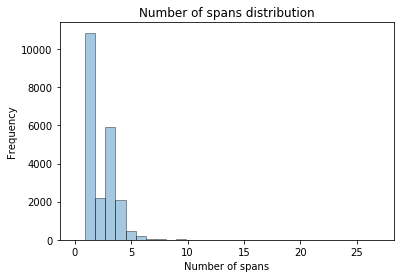

In [15]:
# Number of spans

sns.distplot(df['MAIN_UNIT_SPANS_045'], kde = False, bins = 30, hist_kws=dict(edgecolor="k"))
plt.title('Number of spans distribution')
plt.xlabel('Number of spans')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['MAIN_UNIT_SPANS_045'].value_counts()

1     10857
3      5929
2      2179
4      2106
5       482
6       212
7        67
8        43
9        20
10       14
12        5
0         3
21        2
11        2
16        2
20        1
14        1
26        1
17        1
27        1
15        1
Name: MAIN_UNIT_SPANS_045, dtype: int64

For structural reasons, 2-span girder bridges are not as efficient as the ones with 1 and 3 spans. We can see that the bridges we are studying follow this rule of thumb.

We can also see 3 bridges with no spans. There might have been a mistake while writing down the information. We will drop those items.

In [38]:
df= df[df['MAIN_UNIT_SPANS_045']!=0]

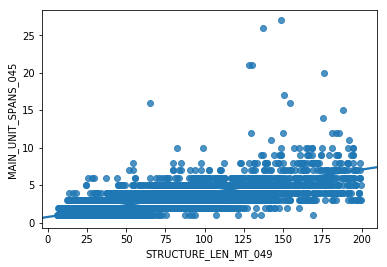

In [18]:
sns.regplot(x='STRUCTURE_LEN_MT_049', y='MAIN_UNIT_SPANS_045', data=df)

Structure length and number of spans clearly have a linear relationship. The more spans a bridge has, the longer it gets.

In [39]:
# We will remove outliers by filtering the bridges with less than 14 spans

df = df[df['MAIN_UNIT_SPANS_045']<15]

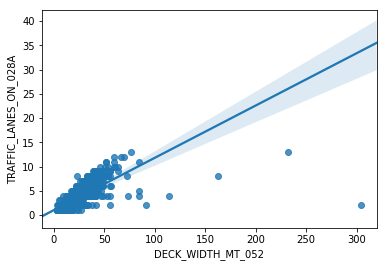

In [20]:
# Deck width and traffic lanes relationship

sns.regplot(x='DECK_WIDTH_MT_052', y='TRAFFIC_LANES_ON_028A', data=df)

There is obviously a relationship between the deck width and the number of traffic lanes. 

We can see some outliers like a 300 m wide deck with less than 5 traffic lanes on it. This would mean that lanes are 60 meters wide, when the average traffic lane width is less than 4 meters. 

We will drop those outliers.


In [40]:
print('The maximum number of lanes we have on the dataset is: %d' %df['TRAFFIC_LANES_ON_028A'].max())
print('Therefore, we will drop the deck width that are greater than 5*%d = %d' %(df['TRAFFIC_LANES_ON_028A'].max(),5*df['TRAFFIC_LANES_ON_028A'].max()))

The maximum number of lanes we have on the dataset is: 13
Therefore, we will drop the deck width that are greater than 5*13 = 65


In [41]:
df = df[df['TRAFFIC_LANES_ON_028A']<5*df['TRAFFIC_LANES_ON_028A'].max()]

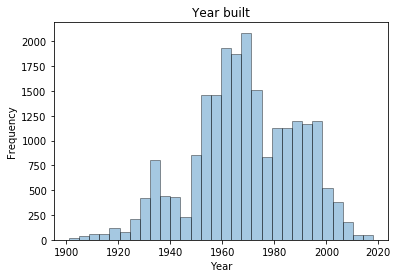

In [23]:
# Year of bridge construction

sns.distplot(df['YEAR_BUILT_027'], kde = False, bins = 30, hist_kws=dict(edgecolor="k"))
plt.title('Year built')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

First thing we see is the effect of the Second World War (1939-1945) in the economy, reflected here in the lack of investment on infrastructures. 

It seems that there is a peak of bridge construction around the 60's and early 70's that can be explained by president Eisenhower's bill of the Federal-Aid Highway Act of 1956.

The project was a 40000 miles (64000 km) Interstate system that was expected to cost 27 billion dollars. The Eisenhower Administration ended on January 20, 1961. By then, 10,440 miles or 25 percent of the 41,000-mile Interstate System had been opened to traffic. The system was proclaimed complete in 1992. (Sources: https://www.fhwa.dot.gov/infrastructure/50interstate.cfm and https://en.wikipedia.org/wiki/Interstate_Highway_System)

Another drop in the amount of new bridges construction comes at the end of the 70's, what is called the Early 1980s recession. 

New York is one the states present in the dataset. New York city, at the southern part of the State, is the most populated city in the United States with 8,398,748 people according to 2018 census.

<img src = './New_York_Population_Map.png'>

Let's see if this concentration of people, and therefore infrastructures to get these people moved, is also reflected in our data.

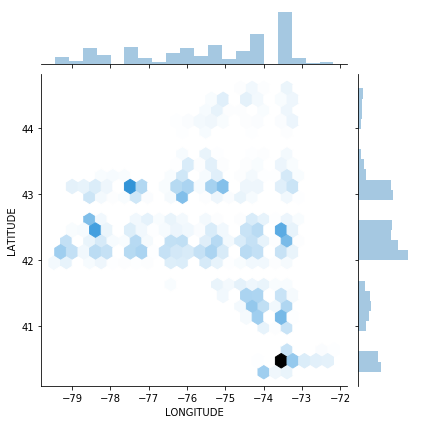

In [43]:
coord = sns.jointplot(x = 'LONGITUDE', y = 'LATITUDE', data = df[df['STATE_CODE_001']==36], kind = 'hex')

In fact, here we have the general shape of the State of New York. We can see a huge concentration of bridges around New York City, and several poles, just as the picture shown above, that correspond to Buffalo, Rochester Syracuse and Albany (from left to right).

After having taken a look at the different features of our dataset, we will focus on the deterioration rate and its relationship with the independent variables.

In [53]:
# Check the deterioration rate distribution 

df['DETERIORATION_RATE'].describe()

count    2.192600e+04
mean     9.749412e-02
std      7.035055e-02
min      5.224579e-17
25%      4.705882e-02
50%      8.333333e-02
75%      1.294118e-01
max      8.974359e-01
Name: DETERIORATION_RATE, dtype: float64

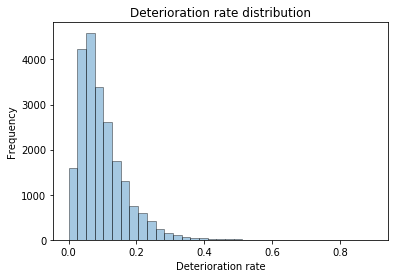

In [54]:
sns.distplot(df['DETERIORATION_RATE'], kde = False, bins = 35, hist_kws=dict(edgecolor="k"))
plt.title('Deterioration rate distribution')
plt.xlabel('Deterioration rate')
plt.ylabel('Frequency')
plt.show()

This histogram show the frequency of all the computed deterioration rates. 

Most bridges show a deterioration rate of around 0.10 (the mean deterioration rate is 0.0975), which means that the bridges are likely to deteriorate almost 0.1 points every year. If a certain bridge has a rating of 8 today, by 2049 it will be on fair conditions. 

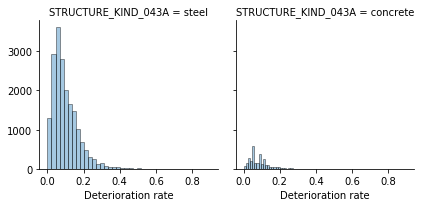

In [27]:
# Deterioration rate distribution VS type of material

h = sns.FacetGrid(df, col = 'STRUCTURE_KIND_043A')
h.map(sns.distplot, 'DETERIORATION_RATE', kde = False, bins = 40, hist_kws=dict(edgecolor="k")).set_xlabels('Deterioration rate')

In [52]:
df['STRUCTURE_KIND_043A'].value_counts()

steel       19074
concrete     2852
Name: STRUCTURE_KIND_043A, dtype: int64

As it also can be seen in the histogram above, the number of concrete bridges is almost seven times less than the number of bridges made of steel. 

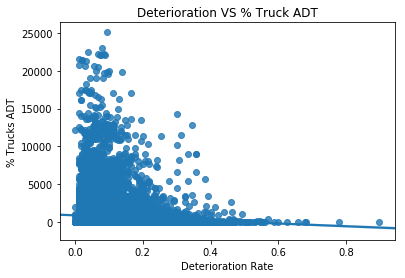

In [29]:
# Truck ADT
sns.regplot(x='DETERIORATION_RATE', y = 'TRUCK_ADT', data = df)
plt.title('Deterioration VS % Truck ADT')
plt.xlabel('Deterioration Rate')
plt.ylabel('% Trucks ADT')
plt.show()


Doesn't seem to have a linear relationship between % trucks and the deterioration rate.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

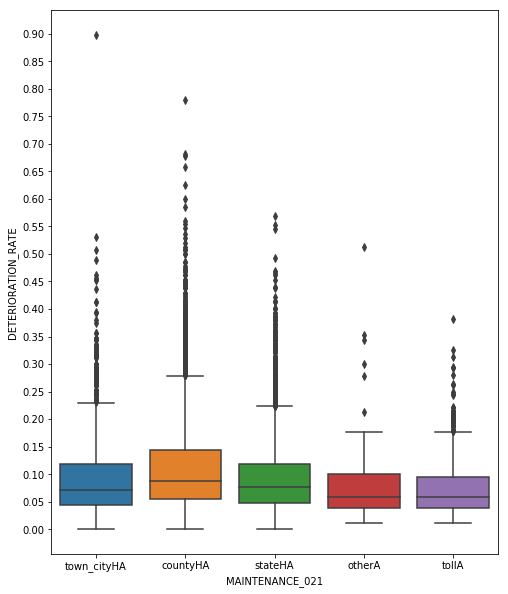

In [31]:
# Maintenance responsability

plt.figure(figsize=(8,10))
plt.yticks(np.arange(0, 1, 0.05))
sns.boxplot(x='MAINTENANCE_021', y='DETERIORATION_RATE', data = df)
plt.plot

It seems that when the maintenance responsability is on Toll Agencies and Other Agencies (grouped all the minority agencies that own bridge maintenance like Army, NASA, National Park or even private people), the deterioration rates of 75% of the bridges don't go further than 0.20. 

On the contrary, when the responsability is on County Highway Agencies, rates slowly increase towards 0.30. 

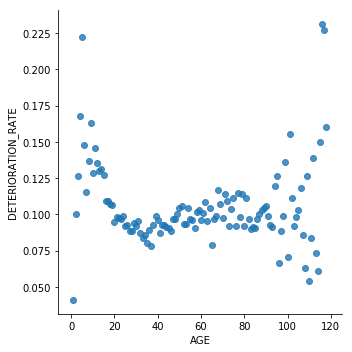

In [32]:
df_age = df.groupby('AGE').mean()
df_age = df_age.reset_index()
sns.lmplot(x='AGE', y='DETERIORATION_RATE', data = df_age, fit_reg=False)

We don't see a clear relationship between age and deterioration rates. It seems that newly built bridges have higher deterioration rates, which wouldn't be our first though. 

However, the definition of the initial ratings of this dataset (deck, superstructure and substructure) says that they evaluate the difference between the on-site bridge and the as-built drawings. When bridges are built and opened to traffic, materials start deteriorating, not from a structural point of view but more from a visual perspective. In fact, bridges are not deadless structures. They continue evolving through the years. 

For example, due to shrinkage effects, concrete tends to retract from its original form by ejecting water, then cracks appear on the surface. This phenomenon doesn't come from a bad execution of the works nor a lack of maintenance, it's just how the concrete material evolves. Those cracks don't affect the structural capacity of the element as short term but have to be taken into account in the inspection reports because water can filter through those cracks and create spalling and reinforcement bars corrosion in long-term.

Deterioration effects caused by shrinkage, creep and corrosion of wheatering steel (Corten) happen in the first  five/six years of the bridge life and stay with the years usuallly without increasing their effects on the structure (other deterioration phenomena can happen along those years). 

So, for example, let's choose a bridge that was built in 2008 which started with a rating of 9. The inspections programs are made every two years. A typical inspection report for this bridge will be:
    - On 2010: rating of 9
    - On 2012: rating of 8, since the first superficial deteriorations appear
    - On 2014: rating of 7, cracks can be seen and a little bit of oxid from the steel bars sticks out from those cracks. 
    - On 2016: rating of 7, same appearance as in the previous inspection. This little bit of corrosion has created a rust film around the bars but shrinkage effects have stopped and so does oxidation. 
    - On 2018: still rating of 7
    
The deterioration rate of this bridge will be (9-7)/(2018-2008) = 0.20, which is further away from the average rating of the bridges we have.

We can divide the deterioration rates of bridges into two parts: short-term deterioration (those first 12 years more or less) and long-term deterioration. Since this short-term deterioration always happens on the structures regardless of the different factors acting on the bridge, we will focus our study on this long-term deterioration rate.

In [12]:
# Let's save the original dataset first

df.to_csv(r'./df_EDA.csv', index = None, header=True)

In [62]:
df_age15 = df[df['AGE']>15]
print('By filtering to get those long-term deterioration rates, we are loosing %d bridges.' %(df.shape[0]-df_age15.shape[0]))

By filtering to get those long-term deterioration rates, we are loosing 524 bridges.


<Figure size 576x720 with 0 Axes>

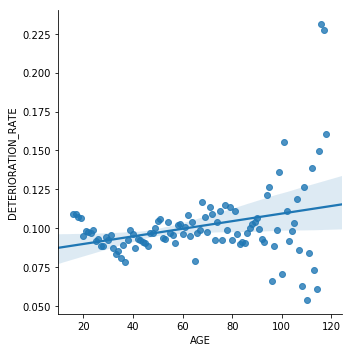

In [63]:
df_age15 = df_age15.groupby('AGE').mean()
df_age15 = df_age15.reset_index()

plt.figure(figsize=(8,10))
sns.lmplot(x='AGE', y='DETERIORATION_RATE', data = df_age15, fit_reg=True)

We might take out the outliers that are generated for bridges older than 95 years.

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x720 with 0 Axes>

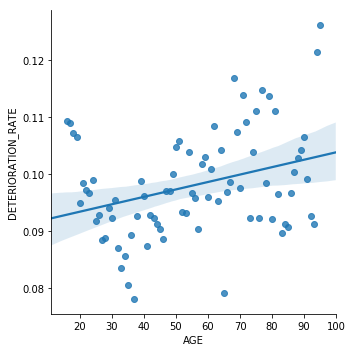

In [64]:
df_age1595 = df_age15[(df_age15['AGE']<=95)]
df_age1595 = df_age1595.groupby('AGE').mean()
df_age1595 = df_age1595.reset_index()

plt.figure(figsize=(8,10))
sns.lmplot(x='AGE', y='DETERIORATION_RATE', data = df_age1595, fit_reg=True)

In [45]:
df_longt = df[(df['AGE']>15)&(df['AGE']<=95)]

In [14]:
# Let's save the dataset

df_longt.to_csv(r'./df_longt.csv', index = None, header=True)

## Feature transformation

In [46]:
list(df_longt.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'TRAFFIC_LANES_ON_028A',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'YEAR_RECONSTRUCTED_106',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'RECONSTRUCTED',
 'LONGITUDE',
 'LATITUDE',
 'TR18',
 'TR17',
 'TR16',
 'TR15',
 'TR14',
 'TR13',
 'TR12',
 'TR11',
 'TR10',
 'TR09',
 'TR08',
 'TR07',
 'TR06',
 'TR05',
 'TR04',
 'TR03',
 'TR02',
 'TR01',
 'TR00',
 'DETERIORATION_RATE']

In [47]:
df_longt.drop(['STRUCTURE_NUMBER_008',
         'YEAR_BUILT_027',
         'YEAR_RECONSTRUCTED_106',
         'TR18',
         'TR17',
         'TR16',
         'TR15',
         'TR14',
         'TR13',
         'TR12',
         'TR11',
         'TR10',
         'TR09',
         'TR08',
         'TR07',
         'TR06',
         'TR05',
         'TR04',
         'TR03',
         'TR02',
         'TR01',
         'TR00'], axis = 1, inplace = True)

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
df_longt.head()

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,DETERIORATION_RATE
0,19,2,31,steel,3,27.7,84.1,7.9,concrete,65.0,light,0.0,town_cityHA,urban,low,0,-96.000334,42.589667,0.235294
1,19,4,0,concrete,3,24.4,70.1,17.9,concrete,49.0,light,0.0,town_cityHA,urban,low,0,-93.377501,42.010502,0.047059
2,19,4,0,concrete,3,20.7,63.4,20.6,concrete,62.0,light,0.0,town_cityHA,urban,high,0,-93.378668,42.013667,0.164706
3,19,2,30,concrete,3,16.2,43.3,8.3,concrete,32.0,light,0.0,town_cityHA,rural,low,0,-94.456503,41.266668,0.101852
4,19,2,20,concrete,3,21.0,63.1,9.1,concrete,51.0,light,0.0,town_cityHA,urban,low,1,-95.001836,41.247000,0.125000


### Encoding data

The features we will be working with are as follows:

     'STATE_CODE_001': continuous variable, integers that represent the state where the bridge is laid
    
     'TRAFFIC_LANES_ON_028A': continuous variable, integers that represent the number of lanes
     
     'DEGREES_SKEW_034': continuous variable, integers that represent the skew angle of the bridge
     
     'STRUCTURE_KIND_043A': discrete variable, either 'steel' or 'concrete'
     
     'MAIN_UNIT_SPANS_045': continuous variable, integers that represent the number of spans
     
     'MAX_SPAN_LEN_MT_048': continuous variable, floats that represent the maximum span length
     
     'STRUCTURE_LEN_MT_049': continuous variable, floats that represent the total bridge length
     
     'DECK_WIDTH_MT_052': continuous variable, floats that represent the deck width
     
     'SURFACE_TYPE_108A': discrete variable, either 'bituminous', 'concrete' or 'none'
     
     'AGE': continuous variable, floats that represent the age of the bridge (either since its contruction or its reconstruction if any) 
     
     'DESIGN_LOAD_031': discrete variable, can be 'heavy', 'light' or 'other' (implies hierarchy depending on design truck weigth)
     
     'TRUCK_ADT': continous variable, floats that represent the estimation of Annual Average Daily Truck Traffic Volume
     
     'MAINTENANCE_021': discrete variable, indicates which agency has primary responsability for maintaining the bridge
     
     'FUNCTIONAL_CLASS_026': discrete variable, indicates the functional classification of the road, can be either 'rural' or 'urban'
     
     'WATERWAY_EVAL_071': discrete variable, indicates the predisposition to have water running over the bridge, can be either 'none', 'low' or 'high'
     
     'RECONSTRUCTED': discrete variable, indicates if bridges has been reconstructed (1) or not (0)
     
     'LONGITUDE': continuous variable, floats that represent longitude coordinates
     
     'LATITUDE': continuous variable, floats that represent latitude coordinates
     
     'DETERIORATION_RATE': continuous variable, floats that represent the decrease in rating of a structure per year. This will be the feature we will try to predict in this regression problem

Since we want to solve a regression problem, in order to make our algorithms work properly, we will try to encode all the categorical features into continuous variables. 

We have 3 types of categorical features:

    - The ones that only take 2 values ('STRUCTURE_KIND_043A' and 'FUNCTIONAL_CLASS_026'): we will convert them into dummy variables 
    
    - The ones that take more than 2 values without relationship ('MAINTENANCE_021'): we will also encode them as dummy variables
    
    - The ones that take more than 2 values which have a hierarchical relationship ('DESIGN_LOAD_031','WATERWAY_EVAL_071','SURFACE_TYPE_108A'): we will encode them as a sucession of numbers.

In [64]:
df_dum = pd.get_dummies(df_longt, columns=['STRUCTURE_KIND_043A','FUNCTIONAL_CLASS_026', 'MAINTENANCE_021'], drop_first=True)

In [65]:
# Codes for remaining categorical features

code_load = {'other':0,'light':1,'heavy':2}
df_dum['DESIGN_LOAD_031'] = df_dum['DESIGN_LOAD_031'].map(code_load)

code_water = {'none':0, 'low': 1, 'high':2}
df_dum['WATERWAY_EVAL_071'] = df_dum['WATERWAY_EVAL_071'].map(code_water)


code_surf = {'bituminous':2, 'concrete':1, 'none':0}
df_dum['SURFACE_TYPE_108A'] = df_dum['SURFACE_TYPE_108A'].map(code_surf)

In [20]:
df_dum.sample(10)

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,DETERIORATION_RATE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA
14852,36,2,30,2,30.1,63.1,9.6,2,54.0,2,40.26,2,1,-75.213668,43.369669,0.058824,1,0,0,0,0,0
5070,31,2,0,1,18.0,18.3,8.7,1,28.0,2,0.00,1,0,-97.012000,41.448000,0.055556,1,0,0,0,0,0
18809,39,3,3,3,16.2,41.5,16.3,1,32.0,2,415.70,0,0,-82.252168,40.034334,0.027778,1,1,0,1,0,0
18593,39,1,30,1,11.3,12.2,5.8,2,69.0,2,14.63,2,0,-80.480167,40.182500,0.060000,1,0,0,0,0,0
20357,39,2,22,2,21.6,63.1,9.1,1,65.0,1,16.31,0,1,-83.121001,41.257833,0.066667,1,0,0,0,1,0
16969,39,2,0,4,27.4,93.3,11.2,1,55.0,2,0.00,0,0,-81.396669,41.287836,0.018750,1,1,0,1,0,0
15520,36,2,17,1,7.9,8.5,6.3,2,48.0,0,14.94,0,0,-73.461834,44.382169,0.088235,1,0,0,0,0,0
4126,19,2,48,4,43.0,136.9,10.8,1,48.0,2,65.00,0,0,-93.329001,42.343334,0.038889,1,0,0,1,0,0
17083,39,2,0,3,9.1,25.1,10.1,1,54.0,2,186.62,2,1,-81.376168,41.242336,0.127778,1,1,0,0,0,1
5554,31,2,0,1,11.9,12.2,8.1,1,50.0,0,0.00,2,0,-96.335335,41.423334,0.058824,1,0,0,0,0,0


In [66]:
df_dum = df_dum[['STATE_CODE_001',
 'TRAFFIC_LANES_ON_028A',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'WATERWAY_EVAL_071',
 'RECONSTRUCTED',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'MAINTENANCE_021_otherA',
 'MAINTENANCE_021_stateHA',
 'MAINTENANCE_021_tollA',
 'MAINTENANCE_021_town_cityHA',
 'DETERIORATION_RATE']]

We want to investigate the correlation relationships between our variables to understand how some of them may influence other features of the dataset.

In the previous plots of this notebook, we have shown some distributions of individual variables, but not the interaction between all of them.

Therefore, we will create a heatmap where the correlation coefficients between 2 variables will be printed on each grid and colored depending on the intensity of this correlation.

We will use Spearman coefficient because some of the variables may not be linearly correlated with others.

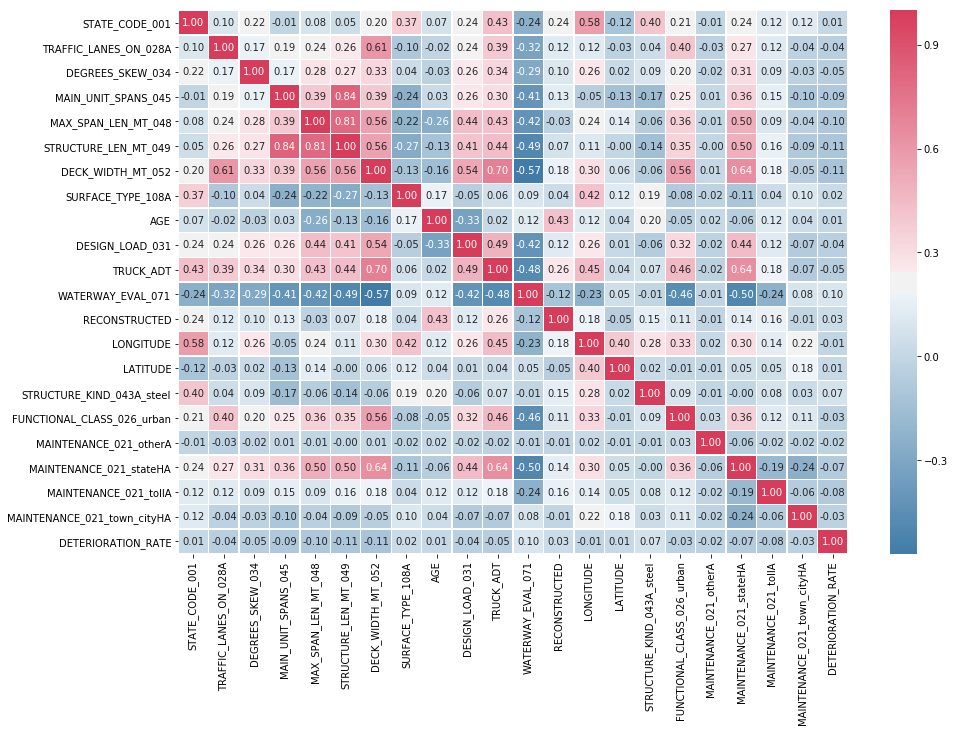

In [73]:
corr_matrix = df_dum.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

### Import elevation data from Google Maps API

In [52]:
elev = pd.read_csv('./elev_tot.csv')


In [53]:
elev.shape

(22507, 3)

In [67]:
df = pd.merge(df_dum, elev, how='left', on=['LATITUDE','LONGITUDE'])

In [68]:
df.head()

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,19,2,31,3,27.7,84.1,7.9,1,65.0,1,0.0,1,0,-96.000334,42.589667,1,1,0,0,0,1,0.235294,400.590332
1,19,4,0,3,24.4,70.1,17.9,1,49.0,1,0.0,1,0,-93.377501,42.010502,0,1,0,0,0,1,0.047059,296.377899
2,19,4,0,3,20.7,63.4,20.6,1,62.0,1,0.0,2,0,-93.378668,42.013667,0,1,0,0,0,1,0.164706,307.136780
3,19,2,30,3,16.2,43.3,8.3,1,32.0,1,0.0,1,0,-94.456503,41.266668,0,0,0,0,0,1,0.101852,410.830414
4,19,2,20,3,21.0,63.1,9.1,1,51.0,1,0.0,1,1,-95.001836,41.247000,0,1,0,0,0,1,0.125000,380.345337


In [69]:
df['elevation'].isna().value_counts()

False    21036
True        14
Name: elevation, dtype: int64

In [70]:
df.dropna(inplace = True)

We will check to see if the elevations we have obtained are consistent with the average elevation on each state. Source: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_elevation:
    - 19 (Iowa): 340 m
    - 31 (Nebraska): 790 m
    - 33 (New Hampshire): 300 m
    - 36 (New York): 300 m
    - 39 (Ohio): 260 m
    - 50 (Vermont): 300 m 

In [71]:
df.groupby('STATE_CODE_001').mean()['elevation']

STATE_CODE_001
19    306.499578
31    496.159185
33    262.366540
36    293.535027
39    284.702583
50    348.820131
Name: elevation, dtype: float64

Elevations are more or less consistent.

In [74]:
df.drop(['STATE_CODE_001'], axis =1, inplace = True)

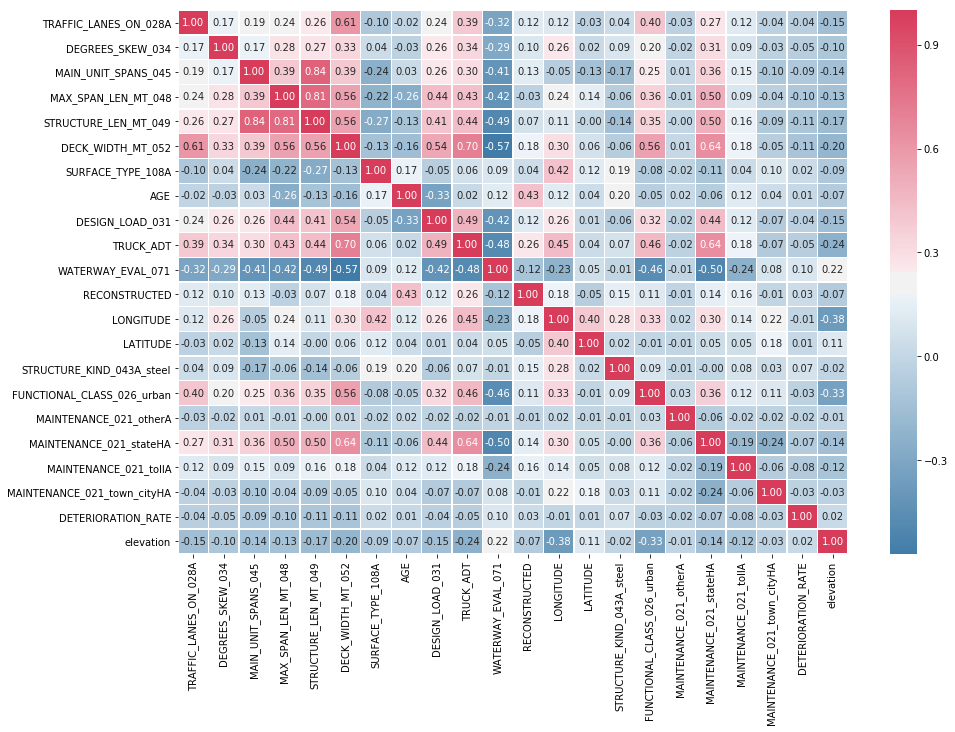

In [75]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

In [76]:
# Save to csv

df.to_csv (r'./df_preparedCLIM.csv', index = None, header=True)
